In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [91]:
# target  : col 14
# 문자열 --> 숫자화
# indep var : 7 개(0==int, 1==str, 3 == str, 4==int, 7==str, 8==str, 9==str)
# decision tree분류기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
enc = LabelEncoder()
y = enc.fit_transform(df[14])

In [93]:
# 1,3,7,8,9
df['영'] = df[0]
df['일'] = enc.fit_transform(df[1])
df['삼'] = enc.fit_transform(df[3])
df['사'] = df[4]
df['칠'] = enc.fit_transform(df[7])
df['팔'] = enc.fit_transform(df[8])
df['구'] = enc.fit_transform(df[9])
df['십사'] = df[14]

In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,영,일,삼,사,칠,팔,구,십사
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,39,7,9,13,1,4,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,50,6,9,13,0,4,1,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,38,4,11,9,1,4,1,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,53,4,1,7,0,2,1,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,28,4,9,13,5,2,0,<=50K


In [95]:
# indep var : 7 개(0==int, 1==str, 3 == str, 4==int, 7==str, 8==str, 9==str)
df1 = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], axis = 1)
df1

,영,일,삼,사,칠,팔,구,십사
0,39,7,9,13,1,4,1,<=50K
1,50,6,9,13,0,4,1,<=50K
2,38,4,11,9,1,4,1,<=50K
3,53,4,1,7,0,2,1,<=50K
4,28,4,9,13,5,2,0,<=50K
...,...,...,...,...,...,...,...,...
32556,27,4,7,12,5,4,0,<=50K
32557,40,4,11,9,0,4,1,>50K
32558,58,4,11,9,4,4,0,<=50K
32559,22,4,11,9,3,4,1,<=50K


In [96]:
X = df1.iloc[:, :-1]
enc = LabelEncoder()
y = enc.fit_transform(df1['십사'])

In [97]:
# decision tree분류기
X_train, X_test, y_train, y_test = train_test_split(X, y , stratify = y, random_state = 10)

KNeighborsClassifier()
Train_score :  0.8398853398853399
Test_score :  0.8011300822994718

BernoulliNB()
Train_score :  0.7324324324324324
Test_score :  0.732342464070753

GaussianNB()
Train_score :  0.7796068796068796
Test_score :  0.777791426114728

LogisticRegression(solver='liblinear')
Train_score :  0.8014742014742015
Test_score :  0.8054293084387667

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)
Train_score :  0.8212940212940213
Test_score :  0.8222577078982926



[Text(0.5, 0.9, 'x[4] <= 0.5\nentropy = 0.796\nsamples = 24420\nvalue = [18539, 5881]'),
 Text(0.25, 0.7, 'x[3] <= 12.5\nentropy = 0.992\nsamples = 9891\nvalue = [5452, 4439]'),
 Text(0.125, 0.5, 'x[3] <= 7.5\nentropy = 0.917\nsamples = 6911\nvalue = [4617, 2294]'),
 Text(0.0625, 0.3, 'x[0] <= 35.5\nentropy = 0.516\nsamples = 1023\nvalue = [905, 118]'),
 Text(0.03125, 0.1, 'entropy = 0.283\nsamples = 264\nvalue = [251, 13]'),
 Text(0.09375, 0.1, 'entropy = 0.58\nsamples = 759\nvalue = [654, 105]'),
 Text(0.1875, 0.3, 'x[0] <= 35.5\nentropy = 0.95\nsamples = 5888\nvalue = [3712, 2176]'),
 Text(0.15625, 0.1, 'entropy = 0.775\nsamples = 1872\nvalue = [1445, 427]'),
 Text(0.21875, 0.1, 'entropy = 0.988\nsamples = 4016\nvalue = [2267, 1749]'),
 Text(0.375, 0.5, 'x[0] <= 28.5\nentropy = 0.856\nsamples = 2980\nvalue = [835, 2145]'),
 Text(0.3125, 0.3, 'x[0] <= 25.5\nentropy = 0.971\nsamples = 150\nvalue = [90, 60]'),
 Text(0.28125, 0.1, 'entropy = 0.802\nsamples = 45\nvalue = [34, 11]'),
 Tex

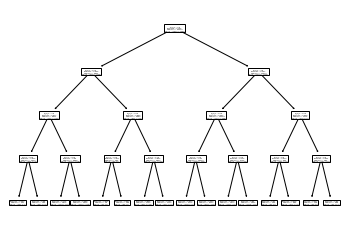

In [115]:
# decision tree분류기
for m in [KNeighborsClassifier(n_neighbors = 5),
         BernoulliNB(), GaussianNB(), LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 3)]:
    m.fit(X_train, y_train)
    print(m)
    print('Train_score : ', m.score(X_train, y_train))
    print('Test_score : ', m.score(X_test, y_test))
    print('')
    
plot_tree(m)

In [116]:
model = [LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 3)]
model_names = ['logis', 'dt1']

for model, model_name in zip(model, model_names):
    m = model
    m.fit(X_train, y_train)
    print(m)
    print('Train_score : ', m.score(X_train, y_train))
    print('Test_score : ', m.score(X_test, y_test))
    print('')
    

LogisticRegression(solver='liblinear')
Train_score :  0.8014742014742015
Test_score :  0.8054293084387667

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)
Train_score :  0.8212940212940213
Test_score :  0.8222577078982926

